# Hardy's Paradox


Hardy's Paradox nicely illustrates the fundamental difference of Quantum Mechanics and classical physics. In particular, it can be used to discuss the claim made by Einstein, Podolsky and Rosen ("EPR") back in 1935. They objected to the uncertainty seen in quantum mechanics, and thought it meant that the theory was incomplete. They thought that a qubit should always know what output it would give for both kinds of measurement, and that it only seems random because some information is hidden from us. As Einstein said: God does not play dice with the universe. 

The idea and part of the source code for this tutorial was published in a previous version of the [Qiskit Textbook](https://qiskit.org/textbook/), in the (now removed) chapter [The Unique Properties of Qubits](https://github.com/Qiskit/qiskit-textbook/blob/master/content/ch-states/old-unique-properties-qubits.ipynb).

This variant of Hardy's Paradox is a relatively simple example for an entangled qubit state that couldn't be reproduced by a few classical bits and a random number generator. It shows that quantum variables aren't just classical variables with some randomness bundled in.

(hit space or right arrow to move to next slide)

## Usage instructions for the user interface

1. "Ctrl -" and "Ctrl +" (or "command -", "command +") adjust the zoom level to fit the text to the browser window
* Use "space" and "shift  space" to navigate through the slides 
* "Shift Enter" executes the interactive cells (might need to click the cell, first)
* Execute the interactive cells on each slide ("In [1]:", etc)
* In case a cell is not formatted correctly, try to double-click and then "Shift Enter" to re-execute
* Interactive cells can be modified, if needed
* "X" at the top left exits the slideshow and enters the jupyter notebook interface

## Manufacturing Cars

Let's assume we build cars.
The cars have a color (red or blue) and an engine type (gasoline or diesel).

The director of the production plant enures us that the following is always true for the first two cars that leave the plant each morning:

1. If we look at the colors of both cars, it never happens that both are red.
* If the engine type of one car is diesel, then the other car is red.

Let's encode the two cars with two qubits, and the colors by a measurement in the (standard) Z Basis, where 0 relates to red and 1 relates to blue. The engine type is encoded by a measurement in the X Basis, where 0 relates to gasoline and 1 relates to diesel.

Or in short: <br>
Z color: 0 red, 1 blue <br>
X engine type: 0 gasoline, 1: diesel

We now initialize the quantum circuit and create a specific state of the two qubits. 

We will show that this state satisfies the two conditions mentioned before. 

We will then analyze the question if both cars can be diesel.

In [2]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram

The following circuit creates a specific entangled state of the two qubits.

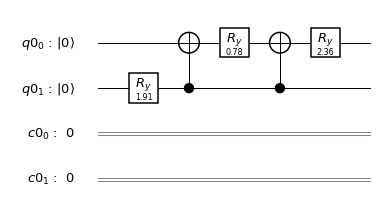

In [3]:
# hit "shift + Enter" to execute this cell
q = QuantumRegister(2) # create a quantum register with one qubit
# create a classical register that will hold the results of the measurement
c = ClassicalRegister(2) 
qc_hardy = QuantumCircuit(q, c)
qc_hardy.ry(1.911,q[1])
qc_hardy.cx(q[1],q[0])
qc_hardy.ry(0.785,q[0])
qc_hardy.cx(q[1],q[0])
qc_hardy.ry(2.356,q[0])

qc_hardy.draw(output='mpl')

Let's see what happens if we look at the color of both cars, i.e. if we make an Z measurement on each of the qubits. <br>
A result of 00 would indicate that both cars are red, which is not allowed by rule #1.

Results for two z (=color) measurements:


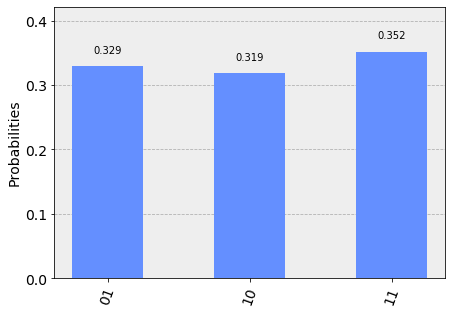

In [5]:
measurements = QuantumCircuit(q,c)
# z measurement on both qubits
measurements.measure(q[0],c[0])
measurements.measure(q[1],c[1])
qc = qc_hardy + measurements
print('Results for two z (=color) measurements:')
plot_histogram(execute(qc,Aer.get_backend('qasm_simulator')).result().get_counts())

The count of 00 is zero, and so these qubits do indeed satisfy property 1.

Next, let's see the results of an x (engine type) measurement of one and a z (color) measurement of the other.<br>
A result of 11 would indicate that car 1 is a diesel and car two is blue, which is not allowed by rule #2.

Results for an x (engine type) measurement on qubit 0 and a z (color) measurement on qubit 1:


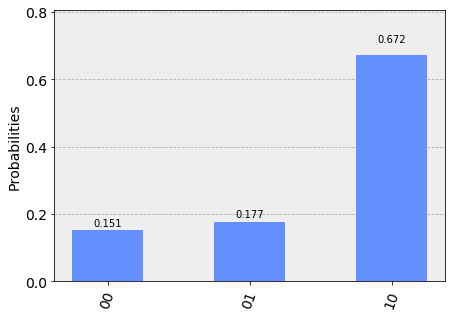

In [6]:
measurements = QuantumCircuit(q,c)
# x measurement on qubit 0
measurements.h(q[0])
measurements.measure(q[0],c[0])
# z measurement on qubit 1
measurements.measure(q[1],c[1])
qc = qc_hardy + measurements
print('Results for an x (engine type) measurement on qubit 0 and a z (color) measurement on qubit 1:')
plot_histogram(execute(qc,Aer.get_backend('qasm_simulator')).result().get_counts())

The count of 11 is zero. 

If we also show that the same is true if we measure the other way round (), we have shown that the cars (qubits) satisfy property #2.

Results for an z (color) measurement on qubit 0 and a x (engien type) measurement on qubit 1:


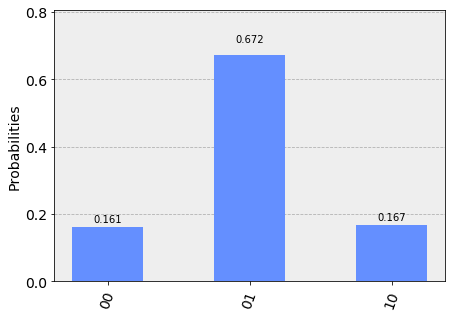

In [7]:
measurements = QuantumCircuit(q,c)
# z measurement on qubit 0
measurements.measure(q[0],c[0])
# x measurement on qubit 1
measurements.h(q[1])
measurements.measure(q[1],c[1])
qc = qc_hardy + measurements
print('Results for an z (color) measurement on qubit 0 and a x (engien type) measurement on qubit 1:')
plot_histogram(execute(qc,Aer.get_backend('qasm_simulator')).result().get_counts())

As result 11 never occurs, property #2 also holds true. 

What can we now infer (classically) about the engine types of both cars?

Let's first recall the properties we have confirmed:

1. If we look at the colors of the cars, it never happens that both are red.
* If the engine type of one car is diesel, then the other car is red.

Let's assume we measure the engine type for both cars and both would be diesel. Then by applying property #2, we can deduce what the result would have been if we had made color measurements instead: We would have gotten an output of red for both. 

However, this result is impossible according to property #1. We can therefore conclude that it must be impossible that both cars are diesel.

But now let's do an measurement of the engine type for both cars, i.e. an measurement in the x basis for both qubits.

Results for two x (engine type) measurement on both qubits:


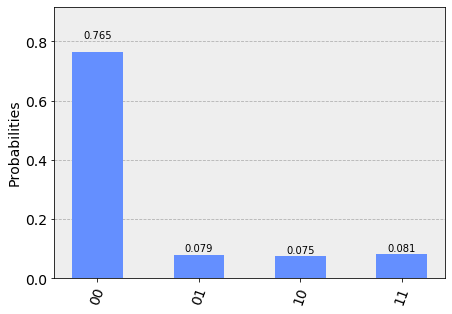

In [8]:
measurements = QuantumCircuit(q,c)
measurements.h(q[0])
measurements.measure(q[0],c[0])
measurements.h(q[1])
measurements.measure(q[1],c[1])
qc = qc_hardy + measurements
print('Results for two x (engine type) measurement on both qubits:')
plot_histogram(execute(qc,Aer.get_backend('qasm_simulator')).result().get_counts())

The result is surprising, because in a few cases we actually measured 11, which encodes the "impossible case" that both cars are diesel.

We reasoned that, given properties 1 and 2, it would be impossible to get the output 11 if we measure engine type for both cars. From the results above, we see that our reasoning was not correct: one in every dozen results will have this 'impossible' result.

How can we explain this?

## Backgound on Hardy's Paradox


In their famous paper in 1935, EPR essentially claimed that qubits can indeed be described by some form of classical variable. They didn’t know how to do it, but they were sure it could be done. Then quantum mechanics could be replaced by a much nicer and more sensible theory.

It took until 1964 to show that they were wrong. J. S. Bell proved that quantum variables behaved in a way that was fundamentally unique. Since then, many new ways have been found to prove this, and extensive experiments have been done to show that this is exactly the way the universe works. We'll now consider a simple demonstration, using a variant of Hardy’s paradox.

## What went wrong?

Our mistake was in the following piece of reasoning.

* By applying property 2 we can deduce what the result would have been if we had made z measurements instead

We used our knowledge of the x (color) outputs to work out what the z (engine type) outputs were. Once we’d done that, we assumed that we were certain about the value of both. 

Our logic would be completely valid if we weren’t reasoning about quantum objects.
But as D.Mermin concludes at the end of his excellent book "...", for quantum objects you have to accept "what didn't happen, didn't happen", i.e. we cannot make an assumptions about a measurement that wasn't done.

This is (part of) what makes quantum computers able to outperform classical computers. It leads to effects that allow programs made with quantum variables to solve problems in ways that those with normal variables cannot. But just because qubits don’t follow the same logic as normal computers, it doesn’t mean they defy logic entirely. They obey the definite rules laid out by quantum mechanics.

In [9]:
import qiskit
qiskit.__qiskit_version__

{'qiskit': '0.10.5',
 'qiskit-terra': '0.8.2',
 'qiskit-ignis': '0.1.1',
 'qiskit-aer': '0.2.1',
 'qiskit-ibmq-provider': '0.2.2',
 'qiskit-aqua': '0.5.2'}

## BACKUP / OLD

Hadamard-Gate maps $\;|0\rangle\;$ to $\;\frac{|0\rangle + |1\rangle}{\sqrt{2}}\;\;$  and   $\;\;|1\rangle\;$ to $\;\frac{|0\rangle - |1\rangle}{\sqrt{2}}$.

If we can show that 
$$ H(\; id( H(|0\rangle) ) \;) = |0\rangle\, $$
and 
$$ H(\;\, X( H(|0\rangle) ) \;)  = |0\rangle, $$  
it becomes clear that if A applies an H-Gate in both of her moves, she wins the game - independent of the move of B (X or id).

Remember: Heads is encoded by $|0\rangle$, Tails encoded by $|1\rangle$. 

The first equation holds because:  

\begin{align*} 
H(\; id(\; H(|0\rangle) \;)\; ) 
      = &\;\; H(\; H(|0\rangle)\; )  \\
      = &\;\; H(\; \frac{|0\rangle + |1\rangle}{\sqrt{2}}\;) \\
      = &\;\; \frac{1}{\sqrt{2}}\;(\; H(|0\rangle) + H(|1\rangle) \;) \\
      = &\;\; \frac{1}{\sqrt{2}}\;(\;\frac{|0\rangle + |1\rangle}{\sqrt{2}} + \frac{|0\rangle - |1\rangle}{\sqrt{2}}\;) \\
      = &\;\; \frac{1}{{2}}\; (\;|0\rangle + |1\rangle + |0\rangle - |1\rangle\; )\\
      = &\;\; |0\rangle
\end{align*}

In case B choses to use an X-Gate instead of id, the following identity

$$ X(\; H(|0\rangle) \;) = X\; (\;\frac{|0\rangle + |1\rangle}{\sqrt{2}}\; ) = \frac{|1\rangle + |0\rangle}{\sqrt{2}} = H(|0\rangle) $$

can be used to show that the final state is $ |0\rangle$:

$$ H(\; X( H(|0\rangle) ) \;) = H(\; H(|0\rangle)\; ) = |0\rangle $$

[These charts](https://github.com/JanLahmann/Fun-with-Quantum/raw/master/QuantumTheory-for-QuantumCoinGame.pdf) explain a bit more of the quantum theory and formlism required to prove the above identities, in case you are interested.